In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pickle

# Sample datasets and models
datasets = ["forebrain", "pancreas", "gastrulation_erythroid", "dentategyrus_lamanno_P5"]
models = ["celldancer", "imVelo", "ivelo", "ivelo_filtered", "velovi", "velovi_filtered", "scvelo", "stochastic"]


# Paths for saving the dictionaries
dic_path = "coherences.pkl"
abs_dic_path = "absolute_coherences.pkl"

"""# Load the coherence dictionaries from Pickle files if they exist
try:
    with open(dic_path, "rb") as pickle_file:
        coherences = pickle.load(pickle_file)
except FileNotFoundError:
    # Initialize an empty dictionary if Pickle file does not exist
    coherences = {}
"""
try:
    with open(abs_dic_path, "rb") as abs_pickle_file:
        coherences = pickle.load(abs_pickle_file)
except FileNotFoundError:
    # Initialize an empty dictionary if Pickle file does not exist
    coherences = {}

# Sample datasets and models
datasets = ["forebrain", "pancreas", "gastrulation_erythroid", "dentategyrus_lamanno_P5"]
models = ["celldancer", "imVelo", "ivelo", "ivelo_filtered", "velovi", "velovi_filtered", "scvelo", "stochastic"]

# Function to plot the CDF of standardized (Z-score) coherence values
def plot_standardized_cdf(coherences, dataset):
    plt.figure(figsize=(10, 6))
    for model in models:
        coherence_values = coherences[dataset][model]
        mean = np.mean(coherence_values)
        std_dev = np.std(coherence_values)
        
        # Avoid division by zero in case of constant values
        if std_dev == 0:
            standardized_values = coherence_values - mean
        else:
            standardized_values = (coherence_values - mean) / std_dev
        
        sorted_values = np.sort(standardized_values)
        cdf = np.arange(1, len(sorted_values) + 1) / len(sorted_values)
        
        plt.plot(sorted_values, cdf, label=model)
    
    plt.title(f"Standardized CDF of Coherence Values for Dataset: {dataset}")
    plt.xlabel("Standardized Coherence (Z-score)")
    plt.ylabel("CDF")
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Example usage of the function for all datasets
for dataset in datasets:
    print(f"\nStandardized CDF Plot for Dataset: {dataset}")
    plot_standardized_cdf(coherences, dataset)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

# Sample datasets and models
datasets = ["forebrain", "pancreas", "gastrulation_erythroid", "dentategyrus_lamanno_P5"]
models = ["celldancer", "imVelo", "ivelo", "ivelo_filtered", "velovi", "velovi_filtered", "scvelo", "stochastic"]

# Paths for saving the dictionaries
dic_path = "coherences.pkl"
abs_dic_path = "absolute_coherences.pkl"

# Load the coherence dictionaries from Pickle files if they exist
try:
    with open(abs_dic_path, "rb") as abs_pickle_file:
        coherences = pickle.load(abs_pickle_file)
except FileNotFoundError:
    # Initialize an empty dictionary if Pickle file does not exist
    coherences = {}

# Function to plot the raw CDFs for each model within a dataset
def plot_raw_cdf(coherences, dataset):
    plt.figure(figsize=(10, 6))
    for model in models:
        coherence_values = coherences[dataset][model]
        sorted_values = np.sort(coherence_values)
        cdf = np.arange(1, len(sorted_values) + 1) / len(sorted_values)
        plt.plot(sorted_values, cdf, label=model)
    
    plt.title(f"Raw CDF of Coherence Values for Dataset: {dataset}")
    plt.xlabel("Coherence")
    plt.ylabel("CDF")
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Function to plot the CDFs based on ranked coherence values
def plot_ranked_cdf(coherences, dataset):
    plt.figure(figsize=(10, 6))
    for model in models:
        coherence_values = coherences[dataset][model]
        ranked_values = np.argsort(np.argsort(coherence_values))  # Rank the coherence values
        sorted_values = np.sort(ranked_values)
        cdf = np.arange(1, len(sorted_values) + 1) / len(sorted_values)
        plt.plot(sorted_values, cdf, label=model)
    
    plt.title(f"Ranked CDF of Coherence Values for Dataset: {dataset}")
    plt.xlabel("Ranked Coherence")
    plt.ylabel("CDF")
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Function to compare the mean or median coherence across models for each dataset
def compare_mean_median(coherences, dataset, statistic='mean'):
    values = []
    model_names = []
    
    for model in models:
        coherence_values = coherences[dataset][model]
        if statistic == 'mean':
            values.append(np.mean(coherence_values))
        elif statistic == 'median':
            values.append(np.median(coherence_values))
        model_names.append(model)
    
    plt.figure(figsize=(10, 6))
    plt.bar(model_names, values)
    plt.title(f"{statistic.capitalize()} Coherence for Each Model in Dataset: {dataset}")
    plt.ylabel(f"{statistic.capitalize()} Coherence")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Example usage for all datasets
for dataset in datasets:
    print(f"\nRaw CDF Plot for Dataset: {dataset}")
    plot_raw_cdf(coherences, dataset)
    
    print(f"\nRanked CDF Plot for Dataset: {dataset}")
    plot_ranked_cdf(coherences, dataset)
    
    print(f"\nMean Coherence Comparison for Dataset: {dataset}")
    compare_mean_median(coherences, dataset, statistic='mean')
    
    print(f"\nMedian Coherence Comparison for Dataset: {dataset}")
    compare_mean_median(coherences, dataset, statistic='median')


In [ ]:
adata 

computing velocity graph (using 1/24 cores)
or disable the progress bar using `show_progress_bar=False`.
    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


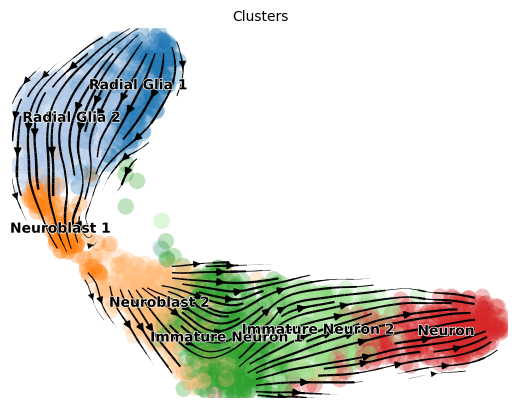

In [8]:
import scanpy as sc
import numpy as np
import scvelo as scv

adata = sc.read_h5ad("/mnt/data2/home/leonardo/git/multilineage_velocity/benchmark/imVelo/forebrain/forebrain/K11/adata/adata_K11_dt_ve.h5ad")

velocities = adata.layers["velocity"]
velocity_norms = np.linalg.norm(velocities, axis=1, keepdims=True)
normalized_velocity = velocities / (velocity_norms + 1e-9)  # Add a small value to avoid division by zero
adata.layers["velocity"] = normalized_velocity

sc.pp.neighbors(adata)
scv.tl.velocity_graph(adata)
scv.pl.velocity_embedding_stream(adata, color="Clusters")